## Precipitação atmosférica em Lavras, MG  
## Observações mensais de janeiro de 1966 a dezembro a 1997

In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

series = pd.read_csv('Database/a3_LAVRAS.csv', header=0, parse_dates=True, index_col=0, squeeze=True)
series.head()

Ano
1966-01-31    515.0
1966-02-28    237.1
1966-03-31    224.2
1966-04-30     24.4
1966-05-31     11.6
Name: Precipitacao, dtype: float64

**Separando os dados para treino, teste e validação**

Vamos separar dois arquivos fisicos:

  - **dataset.csv**: Dados de 1966 a 1996.

  - **validation.csv**: Dados de 1996 a 1997.

In [2]:
# pega a quantidade de linhas e subtrai por 12
split_point = len(series) - 12

In [3]:
# define que a variável dataset vai conter linhas até o split_point
dataset = series[0:split_point]

In [4]:
# define que a variável validation terá os dados do split_point em diante
validation = series[split_point:]

In [5]:
# imprime o tamanho dos conjuntos
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 372, Validation 12


In [6]:
# escreve para o disco
dataset.to_csv('Database/dataset.csv')

In [7]:
# escreve para o disco.
validation.to_csv('Database/validation.csv')

## **Análise com Prophet**

In [8]:
# ds: features temporais
# y: valores a serem preditos

dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [9]:
# dataframe do prophet
dataframe.head()

,ds,y
0,1966-01-31,515.0
1,1966-02-28,237.1
2,1966-03-31,224.2
3,1966-04-30,24.4
4,1966-05-31,11.6


In [10]:
# instancia o objeto prophet
model = Prophet()

In [11]:
# gerando o modelo
model.fit(dataframe)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# gerando dados futuros
future = model.make_future_dataframe(periods = 12, freq='M')

In [13]:
future

,ds
0,1966-01-31
1,1966-02-28
2,1966-03-31
3,1966-04-30
4,1966-05-31
...,...
379,1997-08-31
380,1997-09-30
381,1997-10-31
382,1997-11-30


In [14]:
# prevendo valores para dados futuros
out = model.predict(future)

In [15]:
# imprime saidas
out.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1966-01-31,119.774982,187.341708,383.246147,119.774982,119.774982,162.045706,162.045706,162.045706,162.045706,162.045706,162.045706,0.0,0.0,0.0,281.820688
1,1966-02-28,119.805729,101.296398,300.481814,119.805729,119.805729,79.540043,79.540043,79.540043,79.540043,79.540043,79.540043,0.0,0.0,0.0,199.345773
2,1966-03-31,119.839771,69.297837,259.643572,119.839771,119.839771,44.075529,44.075529,44.075529,44.075529,44.075529,44.075529,0.0,0.0,0.0,163.915300
3,1966-04-30,119.872714,-41.117071,156.252383,119.872714,119.872714,-57.321616,-57.321616,-57.321616,-57.321616,-57.321616,-57.321616,0.0,0.0,0.0,62.551098
4,1966-05-31,119.906755,-50.064094,143.809003,119.906755,119.906755,-76.197157,-76.197157,-76.197157,-76.197157,-76.197157,-76.197157,0.0,0.0,0.0,43.709599


In [16]:
out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
377,1997-06-30,30.492722,-65.501988,129.847271
378,1997-07-31,24.837138,-72.734766,121.844098
379,1997-08-31,28.474506,-71.716272,126.478220
380,1997-09-30,81.488122,-11.378164,177.952992
381,1997-10-31,125.251096,27.065975,224.606758
382,1997-11-30,216.926726,122.323449,312.062843
383,1997-12-31,288.015127,191.722653,387.801050


**Validando o modelo com Prophet**

In [17]:
# dataset de validação
validation_df = pd.DataFrame({'ds': validation.index})

In [18]:
# dados temporais
validation_df['ds']

0    1997-01-31
1    1997-02-28
2    1997-03-31
3    1997-04-30
4    1997-05-31
5    1997-06-30
6    1997-07-31
7    1997-08-31
8    1997-09-30
9    1997-10-31
10   1997-11-30
11   1997-12-31
Name: ds, dtype: datetime64[ns]

In [19]:
# aplicando o modelo do prophet
out = model.predict(validation_df)

In [20]:
# imprime as saidas
out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1997-01-31,301.426841,206.981277,406.379172
1,1997-02-28,207.622095,115.921481,306.968030
2,1997-03-31,174.284399,74.384866,263.214216
3,1997-04-30,75.520582,-19.931861,174.626456
4,1997-05-31,54.547796,-31.269574,156.665168
5,1997-06-30,30.492722,-65.912007,127.727287
6,1997-07-31,24.837138,-70.487973,119.950832
7,1997-08-31,28.474506,-60.845242,132.834269
8,1997-09-30,81.488122,-17.741853,177.768881
9,1997-10-31,125.251096,33.315666,221.203927


In [21]:
validation

Ano
1997-01-31    383.3
1997-02-28    114.5
1997-03-31     96.5
1997-04-30     61.1
1997-05-31     41.0
1997-06-30     52.6
1997-07-31      5.6
1997-08-31      1.2
1997-09-30     38.8
1997-10-31    164.1
1997-11-30    194.8
1997-12-31    253.6
Name: Precipitacao, dtype: float64

In [22]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, out.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 48.670


**Prevendo o futuro**

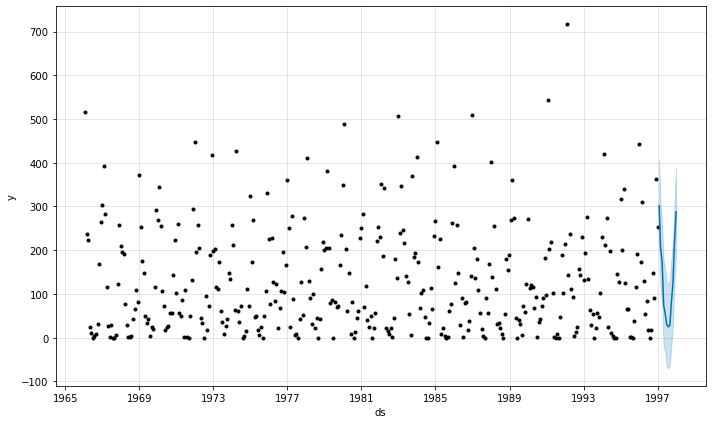

In [23]:
# Python
figure = model.plot(out)

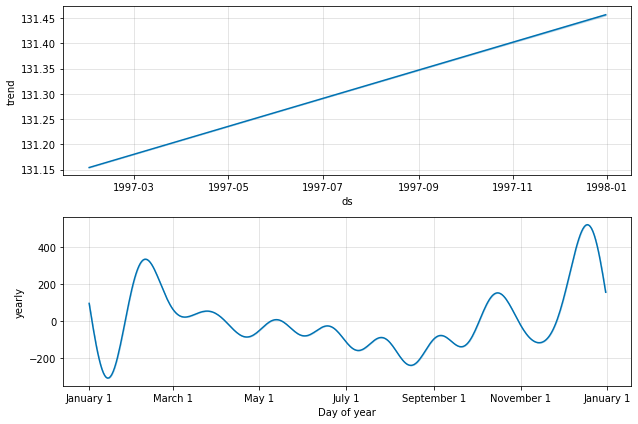

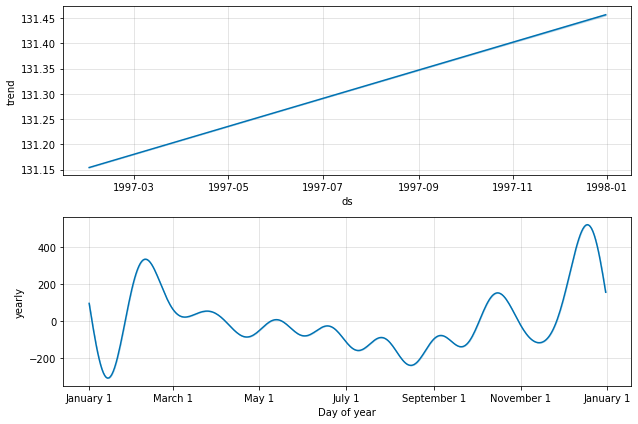

In [24]:
model.plot_components(out)

### Tunning do Prophet

- `seasonality_mode`: Este parâmetro indica como seus componentes de sazonalidade devem ser integrados às previsões. O valor padrão é `additive`, com o parâmetro `multiplicative` sendo a outra opção. Você deve usar o  aditivo quando sua tendência de sazonalidade for "constante" durante todo o período. Por exemplo, quando você deseja que seu impacto no crescimento da tendência anual seja o mesmo que em 2010 e 2018. Isso é aplicável nos dados em que a mudança de tendência parece permanecer constante, por exemplo, o número de pessoas que vivem em uma cidade pequena. Isso ocorre porque não esperamos que o crescimento aumente repentinamente em milhões, porque não há infraestrutura para isso. Por outro lado, quando queremos prever a quantidade de pessoas que vivem em uma cidade em crescimento, o número anual de tendências pode ser muito mais importante nos últimos anos, pois a infraestrutura existe. A taxa de crescimento populacional pode ser muito mais rápida do que teria sido nos primeiros anos. Em um caso como esse, você usará multiplicativo para aumentar a importância das sazonalidades ao longo do tempo. 

- `seasonality_prior_scale`. Este parâmetro novamente permitirá que suas sazonalidades sejam mais flexíveis. É possível definir os parâmetros `anual_seasonality`, `Weekly_seasonality` e `daily_seasonality` separadamente ou ainda adiciona sua própria configuração de sazonalidade.

In [25]:
dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [26]:
dataframe

,ds,y
0,1966-01-31,515.0
1,1966-02-28,237.1
2,1966-03-31,224.2
3,1966-04-30,24.4
4,1966-05-31,11.6
...,...,...
367,1996-08-31,18.1
368,1996-09-30,149.0
369,1996-10-31,90.5
370,1996-11-30,363.2


Alterando o modo de sazonalidade

In [27]:
model = Prophet(seasonality_mode='multiplicative')

In [28]:
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
validation_df = pd.DataFrame({'ds': validation.index})

In [30]:
out = model.predict(validation_df)

In [31]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, out.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 49.671


Alterando tipos de sazonalidade

In [32]:
# cria um modelo com sazonalidade  multiplicativa e desligando a sazonalidade diária
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False)

In [33]:
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [34]:
# imprime a sazonalidade habilitada
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [35]:
# cria o dataframe de validação
validation_df = pd.DataFrame({'ds': validation.index})

In [36]:
# prevendo dados
out = model.predict(validation_df)

In [37]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, out.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 49.671
